In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

In [3]:
# Constants
M = 50 # Grid squares on a side
V = 1.0 # Voltage at top wall
target = 1e-6 # Target accuracy
# Create arrays to hold potential values
# include boundary conditions in our first guess for phi(x,y)
phi = np.zeros([M+1,M+1],float)
phi[:,M] = V
phiprime = np.empty([M+1,M+1],float)

<ipython-input-15-7c5bdaa2ec48>:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im, pad=0.01)


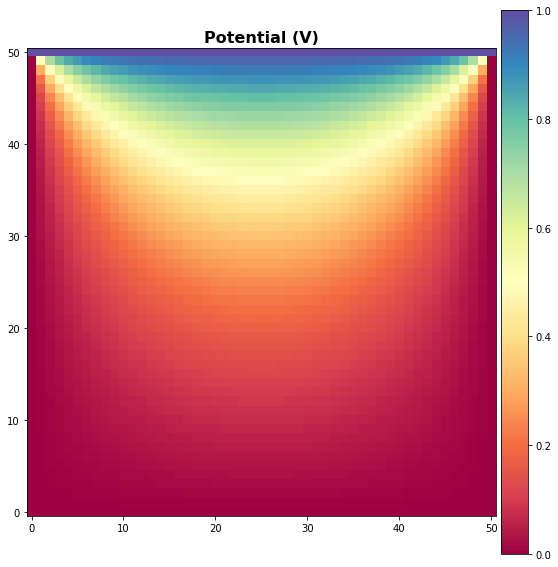

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
# Main loop
delta = 1.0
iteration = 0
while delta>target:
# Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
# enforce the boundary conditions
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                + phi[i,j+1] + phi[i,j-1])/4
# Calculate maximum difference from old values
    delta = np.max(np.abs(phi-phiprime))
# Swap the two arrays to iterate again
#phi, phiprime = phiprime, phi
# or just update the values of phi
    phi[:,:] = phiprime[:,:]
    iteration += 1
if iteration % 100 == 0:
    print('iteration =', iteration, 'delta =', delta)


# plot the solution
#fig, ax = plt.subplots(1,1, figsize=(7,5))
#ax.figure.figsize = (15, 15)
plt.imshow(phi.T, vmin=0, vmax=V, cmap='Spectral', origin='lower')
plt.colorbar(im, pad=0.01)
plt.title('Potential (V)');

iteration = 100 delta = 0.002492570098146407


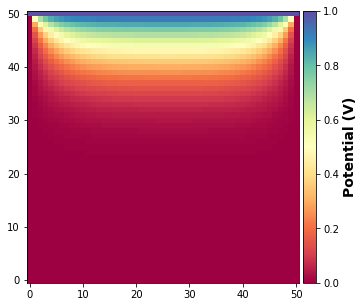

iteration = 200 delta = 0.001073628938686011


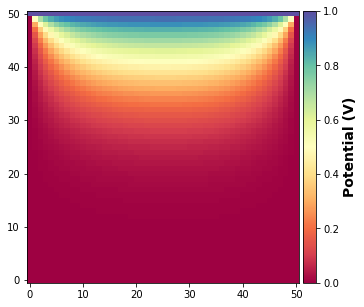

iteration = 300 delta = 0.0005925524190476539


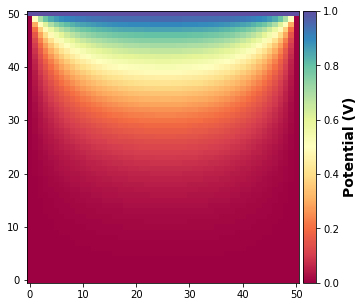

iteration = 400 delta = 0.00036484447837975553


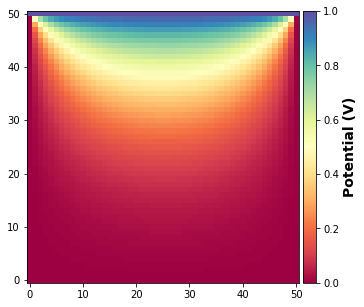

iteration = 500 delta = 0.0002371199975265137


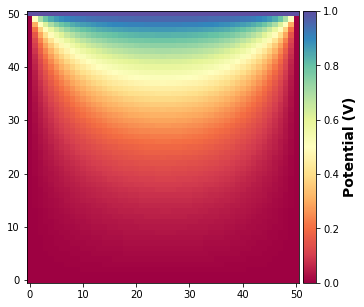

iteration = 600 delta = 0.000157827852055481


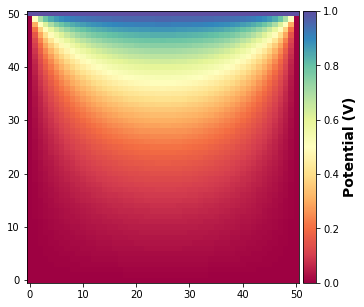

iteration = 700 delta = 0.00010598281901957884


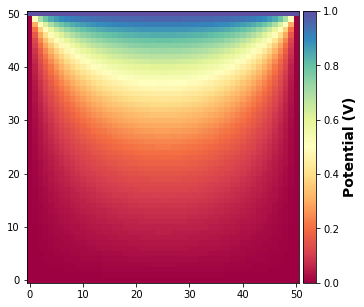

iteration = 800 delta = 7.137813155091988e-05


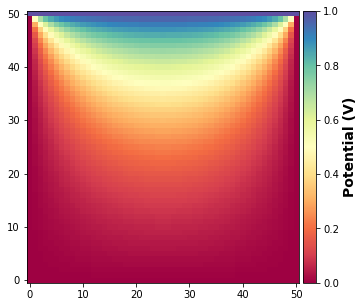

iteration = 900 delta = 4.8084391847169616e-05


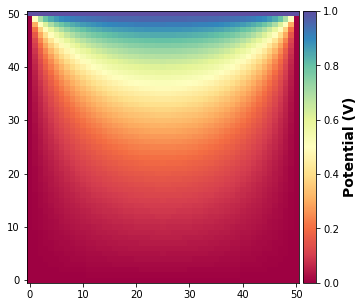

iteration = 1000 delta = 3.2392131455893924e-05


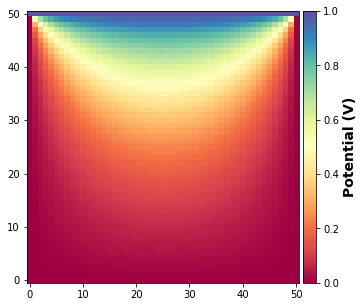

iteration = 1100 delta = 2.182097718989029e-05


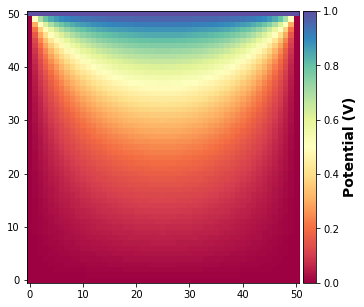

iteration = 1200 delta = 1.4699708228982367e-05


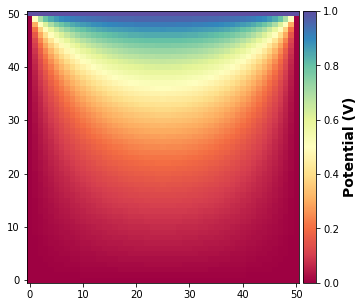

iteration = 1300 delta = 9.902462425881442e-06


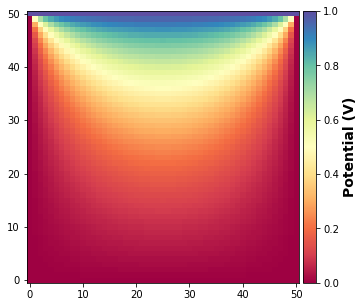

iteration = 1400 delta = 6.670796395630285e-06


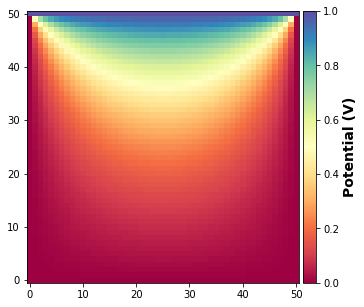

iteration = 1500 delta = 4.4937837181679985e-06


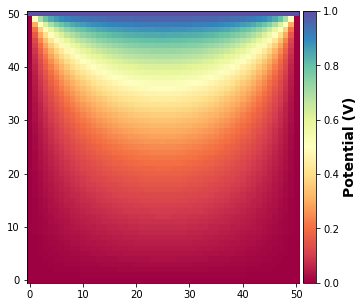

iteration = 1600 delta = 3.0272385627971854e-06


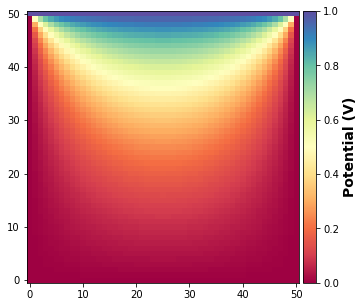

iteration = 1700 delta = 2.0393000396412564e-06


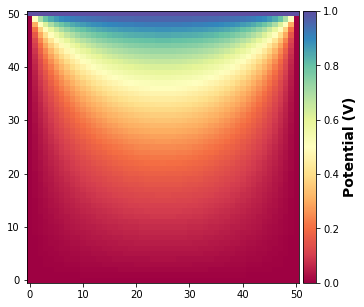

iteration = 1800 delta = 1.3737749984255032e-06


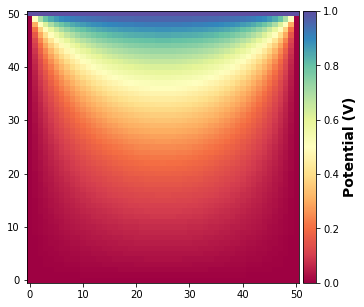

In [17]:
# Constants
M = 50 # Grid squares on a side
V = 1.0 # Voltage at top wall
target = 1e-6 # Target accuracy
# Create arrays to hold potential values
# include boundary conditions in our first guess for phi(x,y)
phi = np.zeros([M+1,M+1],float)
phi[:,M] = V
# Main loop
delta = 1.0
iteration = 0
while delta>target:
    maxdiff = 0.0
# Calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):
            newval = (phi[i+1,j] + phi[i-1,j] \
                + phi[i,j+1] + phi[i,j-1])/4
            diff = np.abs(phi[i,j]-newval)
            phi[i,j] = newval
            if diff > maxdiff:
                maxdiff = diff
    if maxdiff < delta:
        delta = maxdiff
    iteration += 1
    if iteration % 100 == 0:
        print('iteration =', iteration, 'delta =', delta)
        # plot the solution so far
        fig, ax = plt.subplots(1,1, figsize=(7,5))
        im = ax.imshow(phi.T, vmin=0, vmax=V, cmap='Spectral', origin='lower')
        cb = fig.colorbar(im, ax=ax, pad=0.01)
        cb.set_label('Potential (V)')
        plt.show()

iteration = 10 delta = 0.4149825918714576


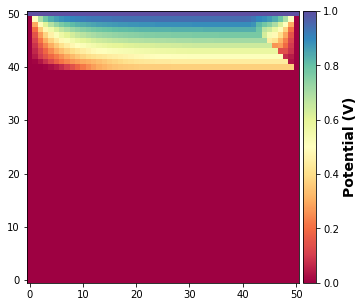

iteration = 20 delta = 0.22230071530142748


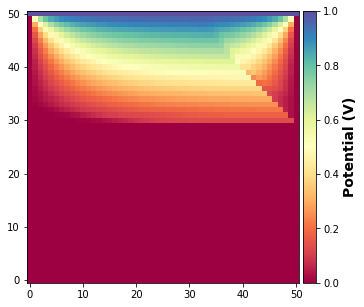

iteration = 30 delta = 0.12160432460715775


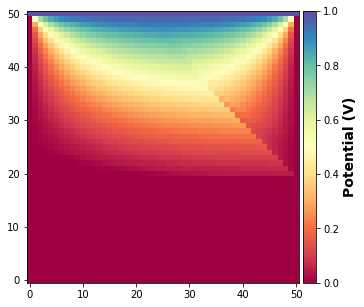

iteration = 40 delta = 0.06787408757409633


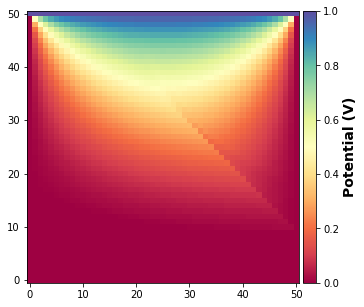

iteration = 50 delta = 0.03791419283401709


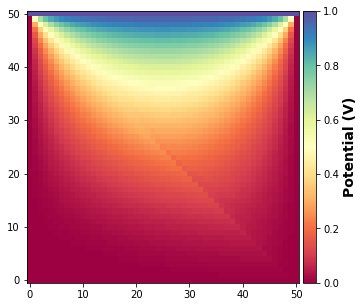

iteration = 60 delta = 0.021856240796370163


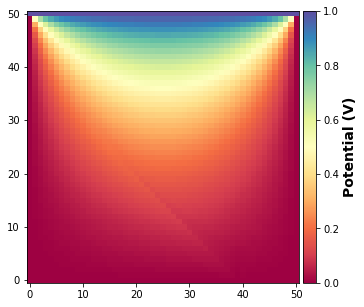

iteration = 70 delta = 0.012971041735192465


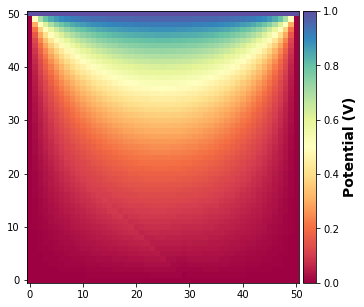

iteration = 80 delta = 0.007895305318532577


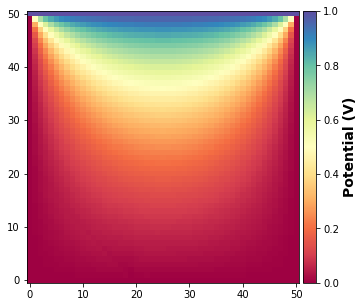

iteration = 90 delta = 0.005519345634177885


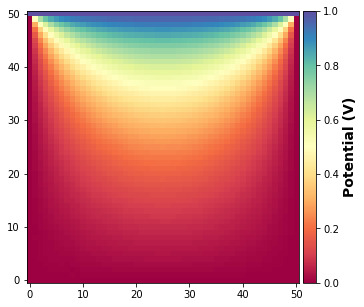

iteration = 100 delta = 0.0025461784380990797


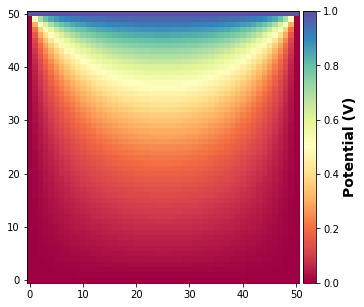

iteration = 110 delta = 4.7358625618718455e-05


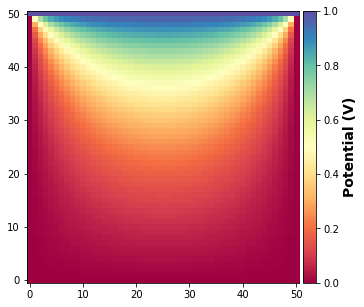

iteration = 120 delta = 6.673443946837092e-06


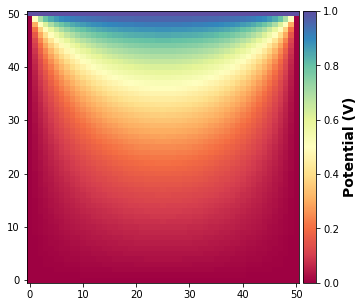

iteration = 130 delta = 2.9256156283130608e-06


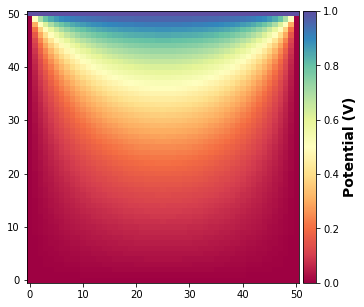

iteration = 140 delta = 1.6708451889349552e-06


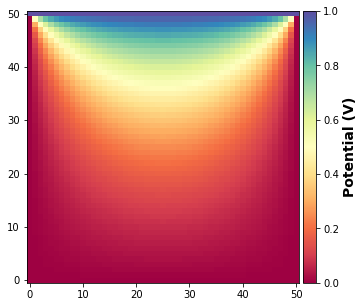

In [19]:
# Constants
M = 50 # Grid squares on a side
V = 1.0 # Voltage at top wall
target = 1e-6 # Target accuracy
omega = 0.9 # relaxation parameter
# Create arrays to hold potential values
# include boundary conditions in our first guess for phi(x,y)
phi = np.zeros([M+1,M+1],float)
phi[:,M] = V
# Main loop
delta = 1.0
iteration = 0
while delta>target:
    maxdiff = 0.0
    # Calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):
            newval = (1 + omega) * (phi[i+1,j] + phi[i-1,j] \
            + phi[i,j+1] + phi[i,j-1])/4 - omega * phi[i,j]
            
            diff = np.abs(phi[i,j]-newval)
            phi[i,j] = newval
    
            if diff > maxdiff:
                maxdiff = diff
    if maxdiff < delta:
        delta = maxdiff
    iteration += 1
    if iteration % 10 == 0:
        print('iteration =', iteration, 'delta =', delta)
        # plot the solution so far
        fig, ax = plt.subplots(1,1, figsize=(7,5))
        im = ax.imshow(phi.T, vmin=0, vmax=V, cmap='Spectral', origin='lower')
        cb = fig.colorbar(im, ax=ax, pad=0.01)
        cb.set_label('Potential (V)')
        plt.show()